In [1]:
import math
import numpy as np
from matplotlib import pyplot as g
from  graphviz import Digraph

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
class Scalar:
    def __init__(self, value, label = '', oprt = '', children = tuple()):
        self.value = value
        self.label = label
        self.oprt  = oprt
        self.children = set(children)
        self.der = 0.0

    def __repr__(self):
        return f"Scalar({self.value}, {self.der})"

    # doulbe underscore method (dunder)
    def __add__(self, other):
        label = f"{self.label}+{other.label}"
        return Scalar(self.value + other.value, label=label, oprt = '+',  children=(self, other))


    def __mul__(self, other):
        label = f"{self.label}*{other.label}"
        return Scalar(self.value * other.value, label=label, oprt = '*', children=(self, other))


    def __neg__(self):
        self.value = -1 * self.value
        return self
        
    def __sub__(self, other):
        out = Scalar(self.value - other.value, oprt='-', children=(self, other))
        return out

    def __truediv__(self, other):
        if type(other) == type(1.0):
            out = Scalar(self.value / other, oprt = '/', children=(self, other))
        else:
            out = Scalar(self.value / other.value, oprt = '/', children=(self, other))
        return out

In [ ]:
def trace(root):
    nodes = set()
    edges = set()
 
    def build(v):
        if v not in nodes:
            nodes.add(v)
            
            for child in v.children:
                edges.add((child, v))
                build(child)

    build(root)   
    
    return nodes, edges

In [ ]:
def draw_graph(root, format='svg', rankdir='LR'):
    nodes, edges = trace(root)
    
    graph = Digraph(format=format, graph_attr={'rankdir': rankdir})
    
    for n in nodes:
        graph.node(name=str(id(n)), label = "{ %s | Val %.4f | Der %.4f }" % (n.label, n.value, n.der), shape='record')
        if n.oprt:
            graph.node(name=str(id(n)) + n.oprt, label=n.oprt)
            graph.edge(str(id(n)) + n.oprt, str(id(n)))
    
    for n1, n2 in edges:
        graph.edge(str(id(n1)), str(id(n2)) + n2.oprt)
    
    return graph

In [ ]:
a = Scalar(3, label='a')
b = Scalar(-2, label='b')
c = Scalar(10, label='c')
e = a * b; e.label='e'
d = c + e; d.label = 'd'
f = Scalar(-3, label='f')
L = d * f; L.label = 'L'

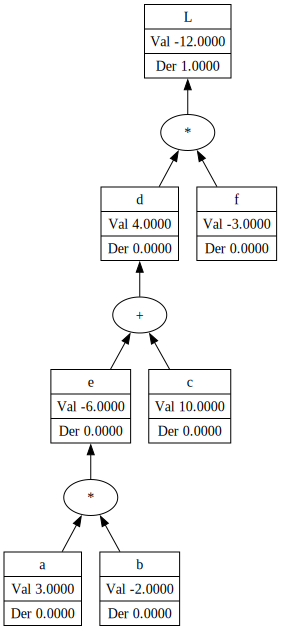

In [ ]:
draw_graph(L)

In [ ]:
# Derivative of L wrt L
# 1
L.der = 1.0

In [ ]:
# Derivative of L wrt d
# dL/df = d
# dL/dd = f
d.der = f.value
f.der = d.value

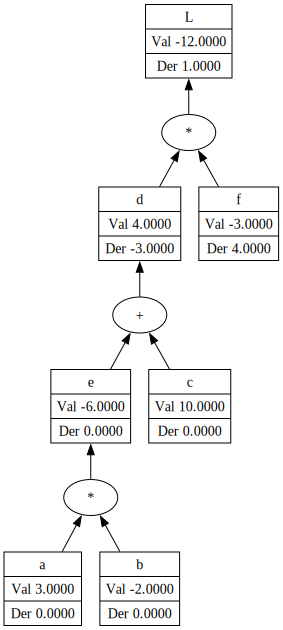

In [ ]:
draw_graph(L)

 Derivative of L wrt c
```
 L = d * f
 d = c + e
```

Local derivative of c = how does d change if c is changed
dd/dc = 1

dL/dc = dL/dd * dd/dc

Chain rule of derivatives!!


we multiply derivatives.

in 10 minutes
A person covers 2km
A bicycle covers 6km
A car covers 12km

Bike is 3 times faster than person
Car is 2 times faster than bike

=> Car is 6 times faster than person
3 * 2

d = c + e 
(e is any constant)
y = x + 3

dy/dx = 

f(x+h) - f(x) / h

x + h + 3 - (x+3) / h

(x + h + 3 -x - 3) / h

h/h
= 1

dd/dc = dy/dx

y = f(x) = 5


dL/dc = dL/dd * dd/dc  = 1 * f = f

c.der  = 1.0 * f.value

In [ ]:
c.der = 1.0 * f.value

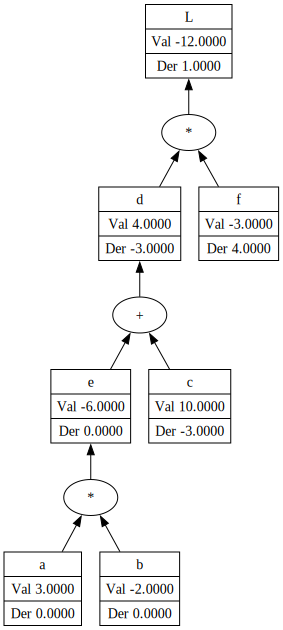

In [ ]:
draw_graph(L)

In [ ]:
# dL/de = dL/dd * dd/de
# dL/de = 1.0 * f.value
e.der = 1.0 * f.value

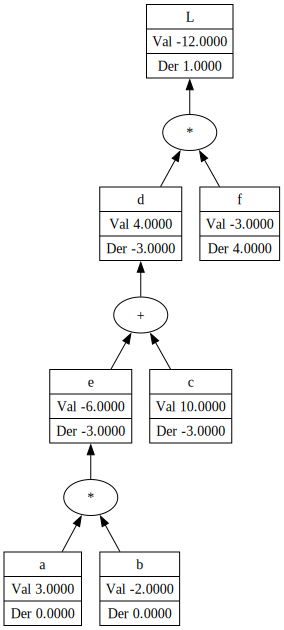

In [ ]:
draw_graph(L)

In [ ]:
# Compute dL/da
#dL/da = dL/de * de/da
#dL/db = dL/de * de/db

#dL/da = f * b
#dL/db = f * a
a.der  = e.der * b.value
b.der = e.der * a.value

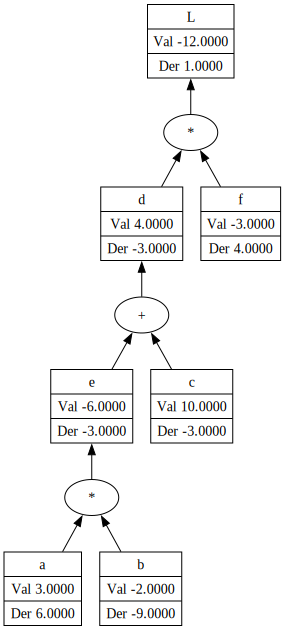

In [ ]:
draw_graph(L)

In [ ]:
# backward pass (back propagation)
# Pass on and calcualte all the derivatives from the output node all the way to leaf nodes

In [ ]:
# forward pass
# Update only the leaf nodes slighlty using the derivatives
a.value = a.value + (0.01) * a.der # learning rate is 0.01
b.value = b.value + (0.01) * b.der # learning rate is 0.01
c.value = c.value + (0.01) * c.der # learning rate is 0.01
f.value = f.value + (0.01) * f.der # learning rate is 0.01

e = a * b

In [ ]:
d = e + c
L = d * f

In [ ]:
print(L.value)

-10.580816000000004


In [ ]:
a.value

3.06

In [ ]:
b.value

-2.09

In [ ]:
c.value

9.97

In [ ]:
f.value

-2.96

In [ ]:
L.value

-10.580816000000004

In [ ]:
def fun():
    h = 0.0001
    
    a = Scalar(3, label='a')
    b = Scalar(-2, label='b')
    c = Scalar(10, label='c')
    e = a * b; e.label='e'
    d = c + e; d.label = 'd'
    f = Scalar(-3, label='f')
    L1 = d * f; L1.label = 'L'


    a = Scalar(3, label='a')
    b = Scalar(-2 , label='b')
    c = Scalar(10, label='c')
    e = a * b; e.label='e'
    d = c + e; d.label = 'd'
    f = Scalar(-3 + h, label='f')
    L2 = d * f; L1.label = 'L'

    

    print((L2 - L1) / h)

In [ ]:
fun()

Scalar(4.000000000008441, 0.0)


In [ ]:
# Neural network with 2 inputs
x1 = Scalar(2.0, label='x1')
x2 = Scalar(0.0, label='x2')
# Two weights
w1 = Scalar(1.0, label='w1')
w2 = Scalar(3.0, label='w2')

x1w1 = x1 * w1; x1w1.label='x1w1'
x2w2 = x2 * w2; x2w2.label='x2w2'
add = x1w1 + x2w2; add.label ='sum'
bias = Scalar(0.9, label='bias')
#y = act(add + bias); y.label='y'




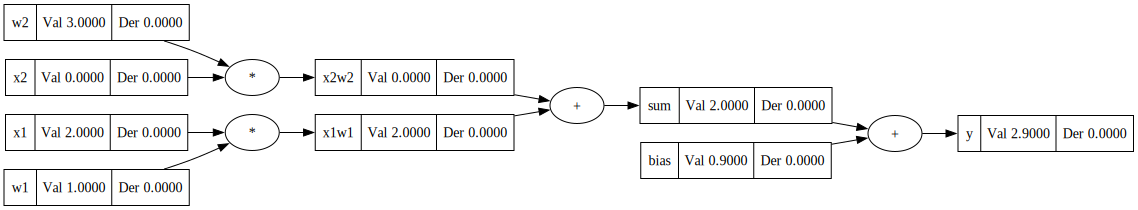

In [ ]:
draw_graph(y)

In [ ]:
xs = np.arange(-50, 50 , 0.2)

In [ ]:
ys = np.tanh(xs)

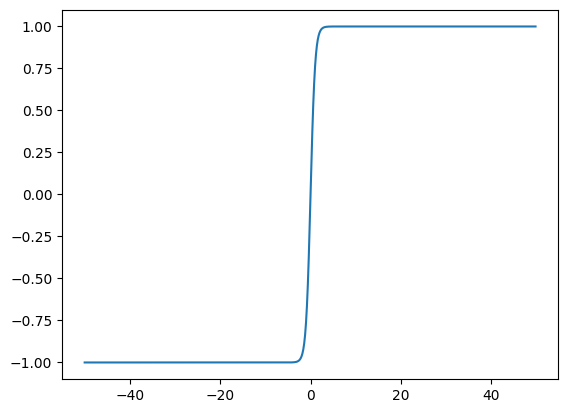

In [ ]:
g.plot(xs, ys)